In [34]:
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [35]:
md = pd.read_csv('merged_data (1).csv')

In [50]:
md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14218 entries, 0 to 14217
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              14218 non-null  int64  
 1   merged_data.p_id        14218 non-null  int64  
 2   merged_data.name        14218 non-null  object 
 3   merged_data.brand       14218 non-null  object 
 4   merged_data.brand_id    14218 non-null  int64  
 5   merged_data.price       14218 non-null  int64  
 6   merged_data.colour      14218 non-null  object 
 7   merged_data.avg_rating  14218 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 1.5+ MB


In [52]:
md.columns=['index','p_id','name','brand','brand_id','price','colour','avg_rating']

In [53]:
md

,index,p_id,name,brand,brand_id,price,colour,avg_rating
0,0,13158392,513 Women Black & Grey Woven-Design Kimono Shrug,513,1,1699,Black,4.573529
1,1,15883214,513 Women Black & Grey Checked Poncho Sweater,513,1,2499,Black,4.486486
2,2,17743260,109F Brown Culotte Jumpsuit,109F,2,1999,Brown,4.101067
3,3,13200776,109F Women Navy Blue Slim Fit Jeans,109F,2,1899,Navy Blue,4.101067
4,4,16920884,109F Women Black Striped Relaxed Trousers,109F,2,1599,Black,4.101067
...,...,...,...,...,...,...,...,...
14213,14300,17799594,ZOLA Grey Bootcut Jeans,ZOLA,1020,3791,Grey,4.750000
14214,14301,14579962,ZOLA Women Black Mid-Rise Denim Shorts,ZOLA,1020,2475,Black,3.807692
14215,14302,17870016,ZOLA Peach-Coloured & Green Floral Printed Cot...,ZOLA,1020,1755,Peach,4.101067
14216,14303,18101028,ZOLA Women Mustard Cotton Print Parade Tunic,ZOLA,1020,5685,Mustard,4.101067


In [54]:
md['price'] = md['price'].astype('int')

In [55]:
md.describe()

,index,p_id,brand_id,price,avg_rating
count,14218.000000,1.421800e+04,14218.000000,14218.000000,14218.000000
mean,7152.420383,1.568950e+07,531.693206,2969.967858,4.101067
std,4127.794607,3.154737e+06,292.375569,2569.989994,0.322562
min,0.000000,7.016600e+04,1.000000,169.000000,1.000000
25%,3580.250000,1.413683e+07,278.000000,1599.000000,4.101067
50%,7151.500000,1.638203e+07,551.000000,2205.000000,4.101067
75%,10721.750000,1.807544e+07,783.000000,3498.000000,4.140389
max,14304.000000,1.941576e+07,1020.000000,47999.000000,5.000000


In [56]:
md=md.drop_duplicates()

In [57]:
md.dropna(axis=0, subset=['colour'], inplace=True)

In [58]:
mean=md['avg_rating'].mean()

In [59]:
md['avg_rating'].fillna(value=mean, inplace=True) 
print (md)

       index      p_id                                               name  \
0          0  13158392   513 Women Black & Grey Woven-Design Kimono Shrug   
1          1  15883214      513 Women Black & Grey Checked Poncho Sweater   
2          2  17743260                        109F Brown Culotte Jumpsuit   
3          3  13200776                109F Women Navy Blue Slim Fit Jeans   
4          4  16920884          109F Women Black Striped Relaxed Trousers   
...      ...       ...                                                ...   
14213  14300  17799594                            ZOLA Grey Bootcut Jeans   
14214  14301  14579962             ZOLA Women Black Mid-Rise Denim Shorts   
14215  14302  17870016  ZOLA Peach-Coloured & Green Floral Printed Cot...   
14216  14303  18101028       ZOLA Women Mustard Cotton Print Parade Tunic   
14217  14304  17721592      ZOLA Women Blue Lightweight Crop Denim Jacket   

      brand  brand_id  price     colour  avg_rating  
0       513         1

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
training_data = md.sample(frac=0.8, random_state=0)
testing_data = md.drop(training_data.index)
training_data

,index,p_id,name,brand,brand_id,price,colour,avg_rating
11364,11432,18610814,STREET 9 Women Lime Green Solid Corset Jumpsuit,STREET 9,841,2699,Lime Green,4.200000
3151,3176,14447490,Dupatta Bazaar Beige & White Ethnic Motifs Emb...,Dupatta Bazaar,242,999,Beige,4.101067
6150,6190,16955144,Kook N Keech Emoji Women White & Sea Green Pri...,Kook N Keech Emoji,479,2199,White,4.101067
13820,13905,14829252,Westwood Women Black Skinny Fit Trousers,Westwood,975,1899,Black,5.000000
12103,12178,17324734,THE WEAVE TRAVELLER Red & Beige Ethnic Motifs ...,THE WEAVE TRAVELLER,892,990,Red,4.101067
...,...,...,...,...,...,...,...,...
5414,5448,13652412,Ishin Women Brown Embroidered Kurti with Shara...,Ishin,408,7399,Brown,3.866171
6657,6697,18882060,Malachi Women Black Washed Denim Shorts,Malachi,541,1599,Black,4.101067
3550,3576,16012536,Fabindia Blue Embroidered Tunic,Fabindia,278,2690,Blue,4.101067
5154,5187,11423192,Inddus Lavender Solid Net Saree With Embroidery,Inddus,389,3599,Lavender,4.144044


In [62]:
import numpy as np

In [63]:
md

,index,p_id,name,brand,brand_id,price,colour,avg_rating
0,0,13158392,513 Women Black & Grey Woven-Design Kimono Shrug,513,1,1699,Black,4.573529
1,1,15883214,513 Women Black & Grey Checked Poncho Sweater,513,1,2499,Black,4.486486
2,2,17743260,109F Brown Culotte Jumpsuit,109F,2,1999,Brown,4.101067
3,3,13200776,109F Women Navy Blue Slim Fit Jeans,109F,2,1899,Navy Blue,4.101067
4,4,16920884,109F Women Black Striped Relaxed Trousers,109F,2,1599,Black,4.101067
...,...,...,...,...,...,...,...,...
14213,14300,17799594,ZOLA Grey Bootcut Jeans,ZOLA,1020,3791,Grey,4.750000
14214,14301,14579962,ZOLA Women Black Mid-Rise Denim Shorts,ZOLA,1020,2475,Black,3.807692
14215,14302,17870016,ZOLA Peach-Coloured & Green Floral Printed Cot...,ZOLA,1020,1755,Peach,4.101067
14216,14303,18101028,ZOLA Women Mustard Cotton Print Parade Tunic,ZOLA,1020,5685,Mustard,4.101067


In [65]:
np.corrcoef(md.brand_id, md.price)

array([[1.        , 0.07109781],
       [0.07109781, 1.        ]])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='p_id'>

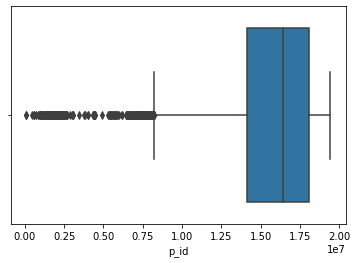

In [66]:
import seaborn as sns
sns.boxplot(md['p_id'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='brand_id'>

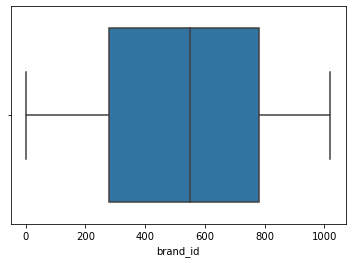

In [67]:
sns.boxplot(md['brand_id'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

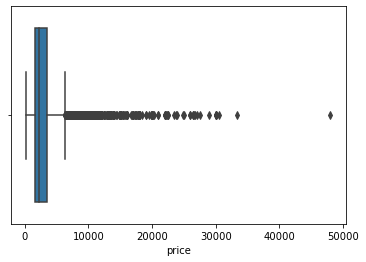

In [68]:
sns.boxplot(md['price'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_rating'>

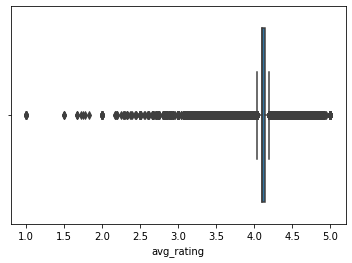

In [69]:
sns.boxplot(md['avg_rating'])

In [70]:
upper_limit = md['p_id'].quantile(0.99)
lower_limit = md['p_id'].quantile(0.01)

In [71]:
merged_data.loc[(md['p_id']> upper_limit) | (md['p_id'] < lower_limit)]

,Unnamed: 0,merged_data.p_id,merged_data.name,merged_data.brand,merged_data.brand_id,merged_data.price,merged_data.colour,merged_data.avg_rating
193,193,2162657,ADIVA Girls Teal Blue & Beige Woven Design Kur...,ADIVA,32,3999,Teal,3.750000
590,594,1753301,Amante Women Black Sports Shorts,Amante,55,1495,Black,4.444444
628,632,19378614,Amrutam Fab Olive Green & Gold-Toned Embroider...,Amrutam Fab,61,11999,Olive,4.101067
964,972,19380220,ANTI CULTURE Women Green Navy Blue Colourblock...,ANTI CULTURE,78,1832,Green,4.101067
965,973,19380214,ANTI CULTURE Women Blue Windcheater and Water ...,ANTI CULTURE,78,1832,Blue,4.101067
...,...,...,...,...,...,...,...,...
13852,13937,19372820,White World Girls Orange & Black Mirror Work R...,White World,977,4999,Orange,4.101067
13988,14073,19351030,Zainab chottani Blue Beads and Stones Pure Geo...,Zainab chottani,1002,2999,Blue,4.101067
13989,14074,19356444,Zainab chottani Grey & Blue Pure Georgette Blo...,Zainab chottani,1002,2999,Grey,4.101067
13990,14075,19350414,Zainab chottani Black & Pink Floral Pure Georg...,Zainab chottani,1002,2999,Black,4.101067


In [72]:
md_df= md.copy()
md_df= md.loc[(md['p_id'] < upper_limit) & (md['p_id'] > lower_limit)]
print('before removing outliers: ', len(md))
print('after removing outliers: ', len(md_df))

before removing outliers:  14218
after removing outliers:  13932


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='p_id'>

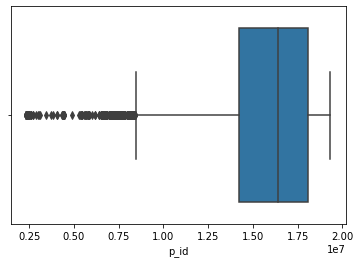

In [73]:
sns.boxplot(md_df['p_id'])

In [76]:
upper_b = md_df['price'].quantile(0.99)
lower_b = md_df['price'].quantile(0.01)

In [78]:
md_df1 = md_df.loc[(md_df['price'] < upper_b) & (md_df['price'] > lower_b)]
print('before removing outliers: ', len(md))
print('after removing outliers: ', len(md_df1))

before removing outliers:  14218
after removing outliers:  13579


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

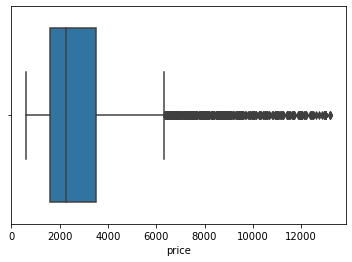

In [79]:
sns.boxplot(md_df1['price'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='p_id', ylabel='Density'>

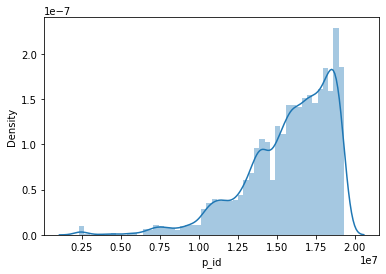

In [80]:
sns.distplot(md_df1['p_id'])

In [81]:
from sklearn.preprocessing import LabelEncoder
 
le = LabelEncoder()
 
label = le.fit_transform(md['colour'])
 
label

array([ 2,  2,  5, ..., 33, 27,  3])

In [82]:
md['colour_ref'] = label

In [83]:
md

,index,p_id,name,brand,brand_id,price,colour,avg_rating,colour_ref
0,0,13158392,513 Women Black & Grey Woven-Design Kimono Shrug,513,1,1699,Black,4.573529,2
1,1,15883214,513 Women Black & Grey Checked Poncho Sweater,513,1,2499,Black,4.486486,2
2,2,17743260,109F Brown Culotte Jumpsuit,109F,2,1999,Brown,4.101067,5
3,3,13200776,109F Women Navy Blue Slim Fit Jeans,109F,2,1899,Navy Blue,4.101067,28
4,4,16920884,109F Women Black Striped Relaxed Trousers,109F,2,1599,Black,4.101067,2
...,...,...,...,...,...,...,...,...,...
14213,14300,17799594,ZOLA Grey Bootcut Jeans,ZOLA,1020,3791,Grey,4.750000,18
14214,14301,14579962,ZOLA Women Black Mid-Rise Denim Shorts,ZOLA,1020,2475,Black,3.807692,2
14215,14302,17870016,ZOLA Peach-Coloured & Green Floral Printed Cot...,ZOLA,1020,1755,Peach,4.101067,33
14216,14303,18101028,ZOLA Women Mustard Cotton Print Parade Tunic,ZOLA,1020,5685,Mustard,4.101067,27


In [84]:
training_data = md.sample(frac=0.8, random_state=0)
testing_data = md.drop(training_data.index)

In [85]:
scaler = MinMaxScaler()
scaler.fit(training_data[['p_id']])
training_data[['p_id']] = scaler.transform(training_data[['p_id']])
scaler.fit(training_data[['brand_id']])
training_data[['brand_id']] = scaler.transform(training_data[['brand_id']])
scaler.fit(training_data[['colour_ref']])
training_data[['colour_ref']] = scaler.transform(training_data[['colour_ref']])
scaler.fit(training_data[['price']])
training_data[['price']] = scaler.transform(training_data[['price']])

In [86]:
scaler.fit(testing_data[['p_id']])
testing_data[['p_id']]= scaler.transform(testing_data[['p_id']])
scaler.fit(testing_data[['brand_id']])
testing_data[['brand_id']]= scaler.transform(testing_data[['brand_id']])
scaler.fit(testing_data[['colour_ref']])
testing_data[['colour_ref']]= scaler.transform(testing_data[['colour_ref']])
scaler.fit(testing_data[['price']])
testing_data[['price']]= scaler.transform(testing_data[['price']])

In [87]:
testing_data

,index,p_id,name,brand,brand_id,price,colour,avg_rating,colour_ref
0,0,0.670066,513 Women Black & Grey Woven-Design Kimono Shrug,513,0.000000,0.047136,Black,4.573529,0.041667
13,13,0.831529,20Dresses Women Black Crop Tailored Jacket,20Dresses,0.001963,0.158109,Black,4.101067,0.041667
21,21,0.894212,20Dresses Women Pink Cable Knit Acrylic Pullover,20Dresses,0.001963,0.107606,Pink,4.101067,0.708333
25,25,0.600766,20Dresses Women Blue Solid Batwing Sleeved Bas...,20Dresses,0.001963,0.070570,Blue,4.714286,0.062500
26,26,0.948500,20Dresses Women Blue Mildly Distressed Light F...,20Dresses,0.001963,0.090771,Blue,4.101067,0.062500
...,...,...,...,...,...,...,...,...,...
14184,14271,0.743257,ZOLA Women Blue Mid-Rise Slim Fit Ankle Length...,ZOLA,1.000000,0.108616,Blue,4.101067,0.062500
14194,14281,0.910671,ZOLA Women Blue Washed Lightweight Crop Cotton...,ZOLA,1.000000,0.090906,Blue,4.101067,0.062500
14197,14284,0.743190,ZOLA Women Blue Slim Fit High-Rise Light Fade ...,ZOLA,1.000000,0.122252,Blue,4.777778,0.062500
14213,14300,0.914784,ZOLA Grey Bootcut Jeans,ZOLA,1.000000,0.117572,Grey,4.750000,0.375000


In [88]:
training_data

,index,p_id,name,brand,brand_id,price,colour,avg_rating,colour_ref
11364,11432,0.958391,STREET 9 Women Lime Green Solid Corset Jumpsuit,STREET 9,0.824338,0.052896,Lime Green,4.200000,0.458333
3151,3176,0.743184,Dupatta Bazaar Beige & White Ethnic Motifs Emb...,Dupatta Bazaar,0.236506,0.017353,Beige,4.101067,0.020833
6150,6190,0.872808,Kook N Keech Emoji Women White & Sea Green Pri...,Kook N Keech Emoji,0.469087,0.042442,White,4.101067,0.979167
13820,13905,0.762917,Westwood Women Black Skinny Fit Trousers,Westwood,0.955839,0.036170,Black,5.000000,0.041667
12103,12178,0.891912,THE WEAVE TRAVELLER Red & Beige Ethnic Motifs ...,THE WEAVE TRAVELLER,0.874387,0.017165,Red,4.101067,0.750000
...,...,...,...,...,...,...,...,...,...
5414,5448,0.702085,Ishin Women Brown Embroidered Kurti with Shara...,Ishin,0.399411,0.151160,Brown,3.866171,0.104167
6657,6697,0.972413,Malachi Women Black Washed Denim Shorts,Malachi,0.529931,0.029898,Black,4.101067,0.041667
3550,3576,0.824083,Fabindia Blue Embroidered Tunic,Fabindia,0.271835,0.052708,Blue,4.101067,0.062500
5154,5187,0.586853,Inddus Lavender Solid Net Saree With Embroidery,Inddus,0.380765,0.071712,Lavender,4.144044,0.437500


In [89]:
X_train = training_data[['p_id', 'brand_id', 'colour_ref']]
y_train = training_data['price']

X_test = testing_data[['p_id','brand_id','colour_ref']]
y_test = testing_data['price']

In [90]:
y_test.describe()

count    2844.000000
mean        0.087258
std         0.083214
min         0.000000
25%         0.040403
50%         0.063971
75%         0.102109
max         1.000000
Name: price, dtype: float64

In [91]:
reg= linear_model.LinearRegression()

In [92]:
model = reg.fit(X_train, y_train)

In [93]:
model

LinearRegression()

In [109]:
predict_y = model.predict(X_test)

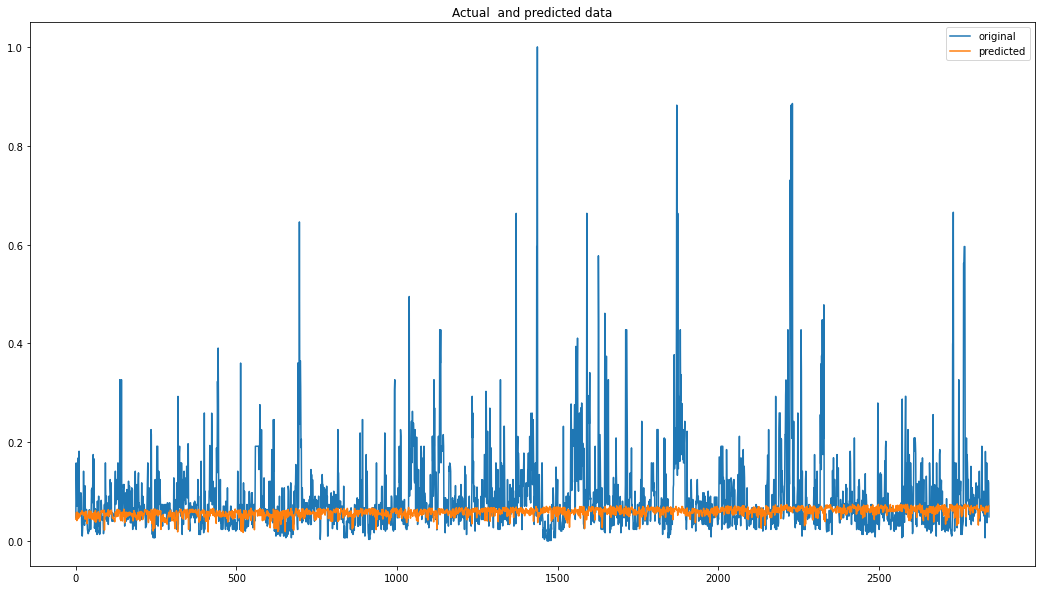

In [110]:
plt.figure(figsize=(18,10))
x_axis=range(len(y_test))
plt.plot(x_axis, y_test, label='original')
plt.plot(x_axis, predict_y, label='predicted')
plt.title('Actual  and predicted data')
plt.legend()
plt.show()

In [114]:
from sklearn import metrics

In [115]:
print('Mean Square Error: ', metrics.mean_squared_error(y_test,y_predict))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_predict))

Mean Square Error:  0.007596073148308451
Mean Absolute Error:  0.046849105414579324


In [116]:
Multiple= metrics.mean_absolute_error(y_test,y_predict)

In [117]:
Multiple

0.046849105414579324

In [118]:
y_predict

array([0.04428702, 0.05133098, 0.0582247 , ..., 0.05946148, 0.0688765 ,
       0.07099179])

In [119]:
X_train.describe()

,p_id,brand_id,colour_ref
count,11374.000000,11374.000000,11374.000000
mean,0.807450,0.522432,0.444142
std,0.163278,0.286655,0.323065
min,0.000000,0.000000,0.000000
25%,0.726474,0.271835,0.062500
50%,0.843637,0.542689,0.500000
75%,0.931461,0.767419,0.708333
max,1.000000,1.000000,1.000000


In [120]:
from sklearn.svm import SVR
l = SVR(kernel = 'linear')
l.fit(X_train, y_train)

SVR(kernel='linear')

In [121]:
a_predict=l.predict(X_test)

In [122]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,a_predict))

Mean Absolute Error:  0.06303683403156551


In [123]:
Linear = metrics.mean_absolute_error(y_test,a_predict)

In [124]:
Linear

0.06303683403156551

In [125]:
from sklearn.svm import SVR
p = SVR(kernel = 'poly')
p.fit(X_train, y_train)

SVR(kernel='poly')

In [126]:
b_predict=p.predict(X_test)

In [127]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,b_predict))

Mean Absolute Error:  0.06308759110516929


In [128]:
Poly= metrics.mean_absolute_error(y_test,b_predict)

In [129]:
r = SVR(kernel = 'rbf')
r.fit(X_train, y_train)

SVR()

In [130]:
c_predict=r.predict(X_test)

In [131]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,c_predict))

Mean Absolute Error:  0.06267718692454474


In [132]:
RBF= metrics.mean_absolute_error(y_test,c_predict)

In [133]:
RBF

0.06267718692454474

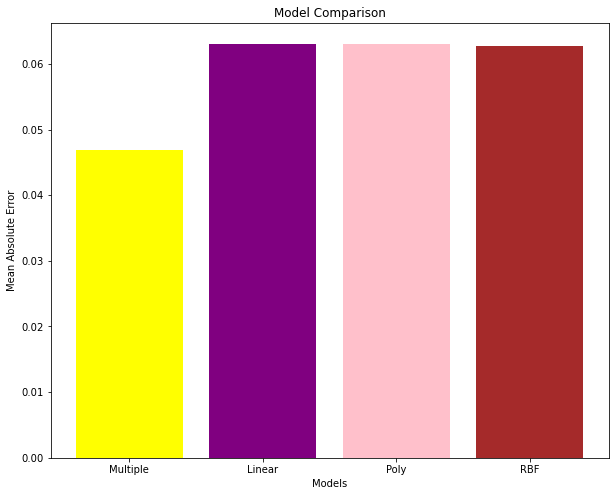

In [135]:
plt.figure(figsize=(10,8))
plt.xlabel('Models')
plt.ylabel("Mean Absolute Error")
plt.title('Model Comparison')
x = np.array(["Multiple", "Linear", "Poly", "RBF"])
y = np.array([Multiple, Linear, Poly, RBF])
plt.bar(x,y, color=['yellow', 'purple','pink', 'brown'])
plt.show()